# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1331.
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           1.08e-44
Time:                        10:29:59   Log-Likelihood:                 9.1212
No. Observations:                  50   AIC:                            -10.24
Df Residuals:                      46   BIC:                            -2.594
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9804      0.072     69.513      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.47813829  4.94432378  5.37415078  5.74282869  6.03451369  6.24491187
  6.3819847   6.46464095  6.51963007  6.57714732  6.66587278  6.80825926
  7.01684342  7.292186    7.62277969  7.98693975  8.35636678  8.70079619
  8.99297061  9.2131182   9.35220109  9.4134003   9.41159309  9.37090867
  9.32076384  9.29102992  9.30712491  9.38583747  9.53256852  9.74044392
  9.99144387 10.25936348 10.51411823 10.72668668 10.87387868 10.94214543
 10.92980548 10.84732103 10.71557898 10.56245931 10.41825446 10.31069235
 10.26038078 10.27742165 10.3597512  10.49347911 10.65517062 10.81569682
 10.94502043 11.01713084]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.00245152 10.86670922 10.62774264 10.32620394 10.01560568  9.74921904
  9.56703122  9.48595516  9.49568865  9.5612367 ]


## Plot comparison

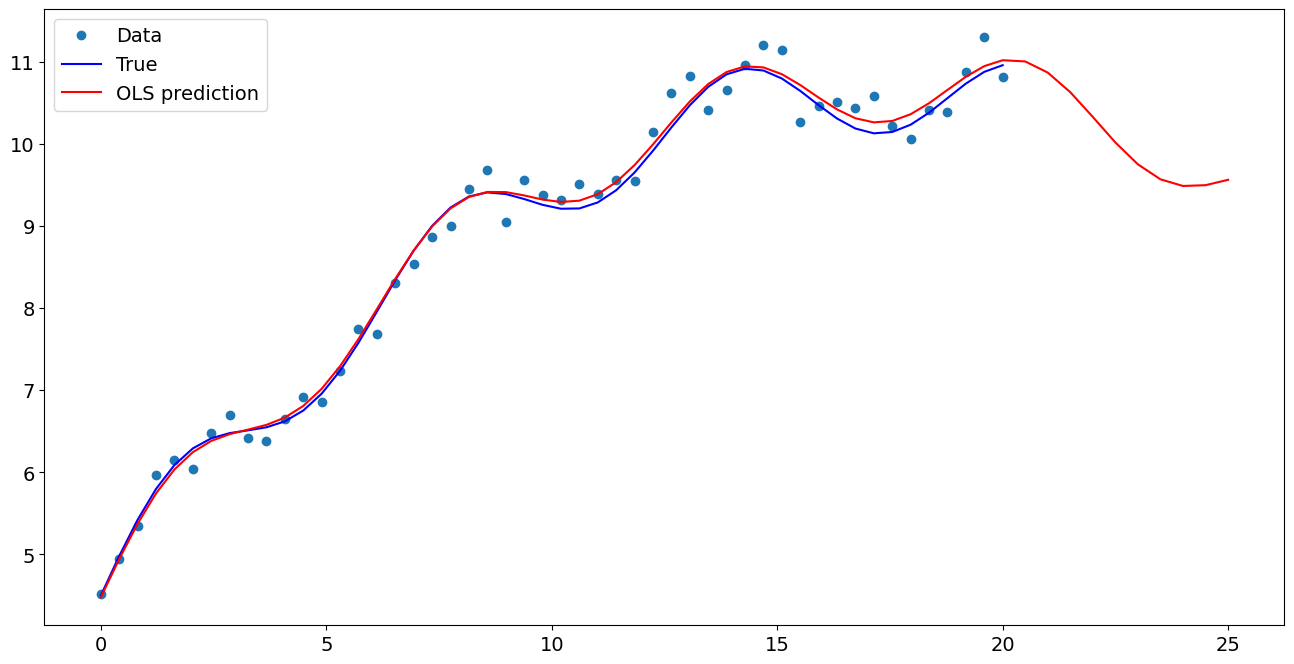

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.980406
x1                  0.507092
np.sin(x1)          0.454881
I((x1 - 5) ** 2)   -0.020091
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.002452
1    10.866709
2    10.627743
3    10.326204
4    10.015606
5     9.749219
6     9.567031
7     9.485955
8     9.495689
9     9.561237
dtype: float64